# Question 3 #
a)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load data and display shape
data = np.genfromtxt('faces.dat')
data.shape

(400, 4096)

In [3]:
# Reshape images
imgs = data.reshape(400, 64, 64)
imgs = np.rot90(imgs, axes=(2, 1))
imgs.shape

(400, 64, 64)

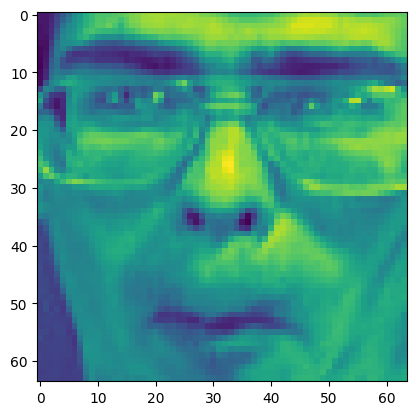

In [5]:
# Show 200th image
plt.imshow(imgs[199], interpolation='None')
plt.show()

b)

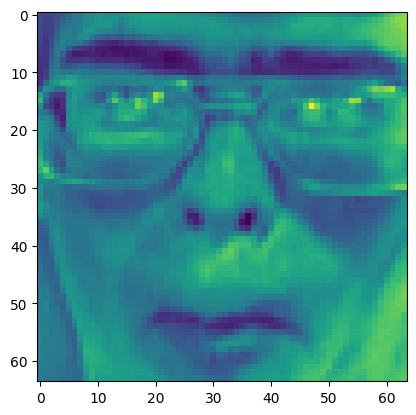

In [7]:
# Remove mean and show 200th image
mean = imgs.mean(axis=0) 
rem_mean_images = imgs - mean 
plt.imshow(rem_mean_images[199], interpolation='None')
plt.show()

c)

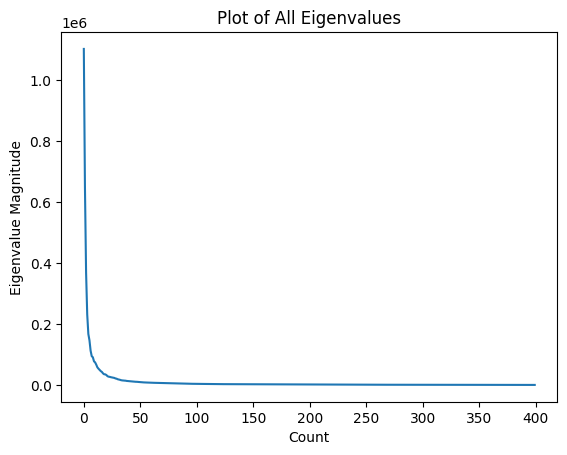

In [11]:
reshaped_images_removed_mean = data.reshape(400, 4096)
pca = PCA(n_components=400)
pca.fit(reshaped_images_removed_mean)

eigenvals = pca.explained_variance_
plt.plot([eigenvals[i].real for i in range(len(eigenvals))])
plt.title('Plot of All Eigenvalues')
plt.xlabel('Count')
plt.ylabel('Eigenvalue Magnitude')
plt.show()

In [20]:
explained_var = []
running_sum = 0

# Sort values in descending order
eigval_sum = 0
for j in range(len(eigenvals)):
  eigval_sum += eigenvals[j]

for i in range(len(eigenvals)):
  running_sum += eigenvals[i]
  explained_var.append(running_sum/eigval_sum)

# Show largest value
print('Largest Eigenvalue:')
print(f'{eigenvals[0]:.4e}')

Largest Eigenvalue:
1.1034e+06


d)

In [24]:
# Display 400th eigenvalue value
print('400th Eigenvalue:')
print(f'{eigenvals[399]:.4e}')

400th Eigenvalue:
1.7813e-25


Each principal component captures a portion of the data's variability, reflecting its underlying structure. The higher a component's eigenvalue, the more information it carries about the variance. Together, these components capture all the variance in the data (up to a limit of 1). As we move through the components, ordered by their eigenvalues, their contribution to the total variance decreases. This is because the most informative components capture the most significant variations first, leaving the last components with very little remaining variance to explain. As shown above, the eigenvalue of the last component is often negligible, indicating its minimal contribution.

e)

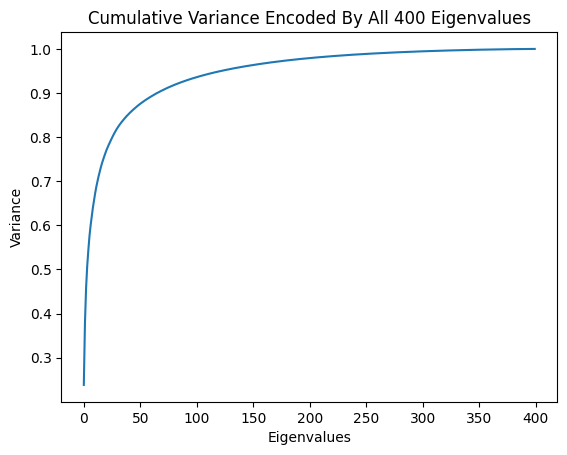

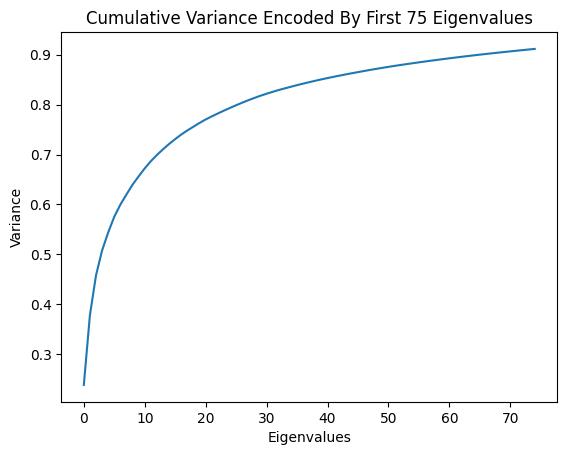

In [25]:
plt.plot(explained_var)
plt.title('Cumulative Variance Encoded By All 400 Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Variance')
plt.show()

plt.plot(explained_var[:75])
plt.title('Cumulative Variance Encoded By First 75 Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Variance')
plt.show()

The graphs clearly shows that the first 75 principal components capture the vast majority of the model's variance. Over 90% of the data's variability is contained within these components. This indicates that only 75 components are sufficient to effectively reconstruct the dataset.

f)

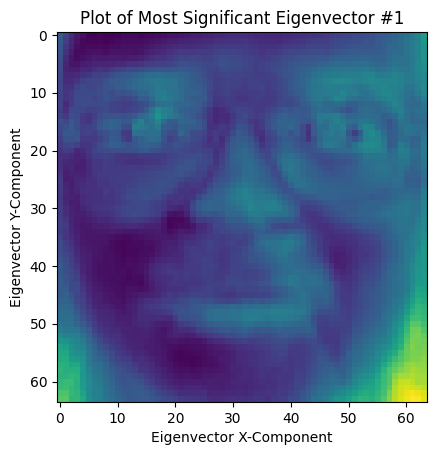

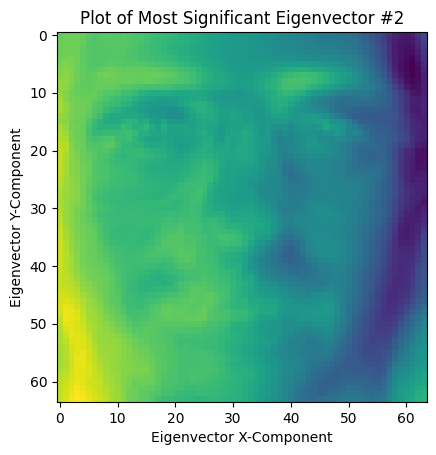

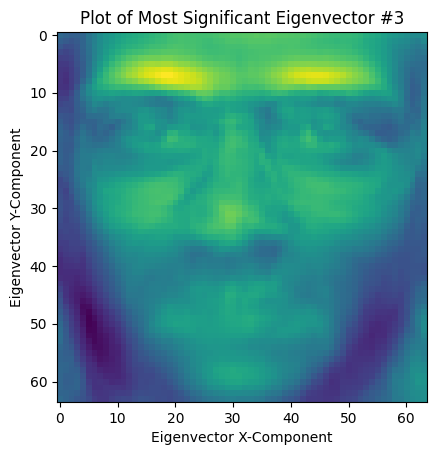

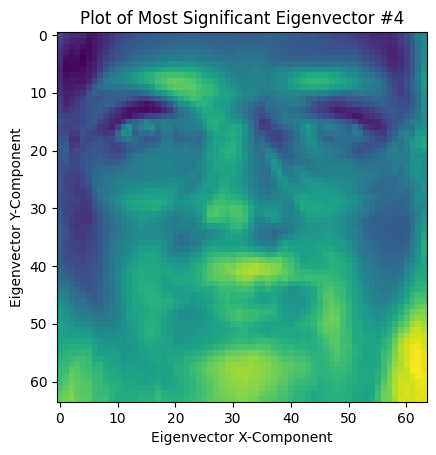

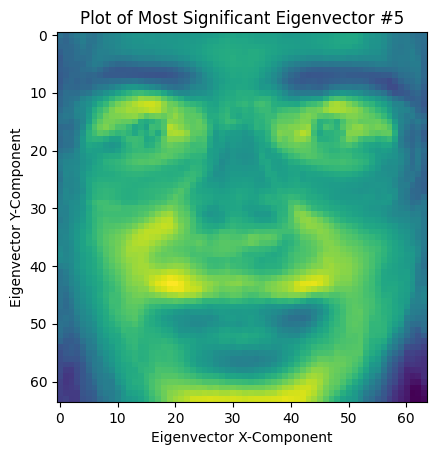

In [28]:
# Display 5 most significant eigenvectors
for i in range(0, 5):
    reshaped_eigface = np.rot90(pca.components_[i].reshape(64, 64), k=1, axes=(1,0))
    plt.imshow(reshaped_eigface)
    plt.title(f'Plot of Most Significant Eigenvector #{i + 1}')
    plt.xlabel('Eigenvector X-Component')
    plt.ylabel('Eigenvector Y-Component')
    plt.show()

g)

In [29]:
# Define function to perform PCA reconstruction
def pcaReconstruction(img, comp):
  reconstructed_img = np.zeros((64, 64))

  for component in range(comp):
    e = np.rot90(pca.components_[component].reshape(64, 64), k=1, axes=(1,0))
    e_T = np.transpose(e)
    e_e_T = np.matmul(e, e_T)
    pc_img = np.matmul(e_e_T, rem_mean_images[img])
    reconstructed_img = np.add(reconstructed_img, pc_img)
  
  return reconstructed_img



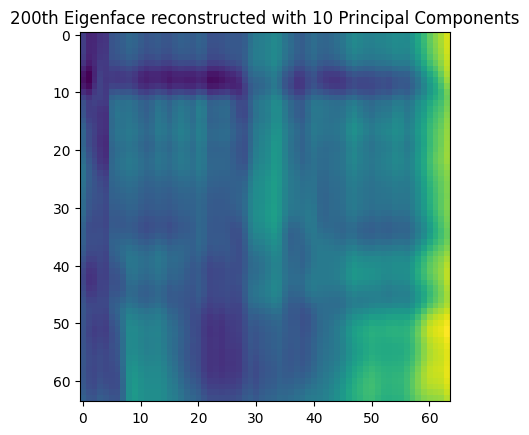

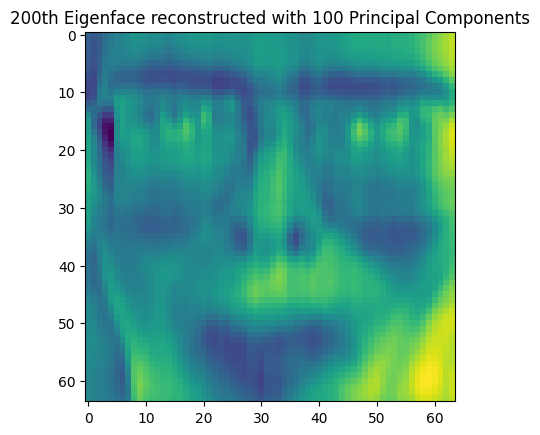

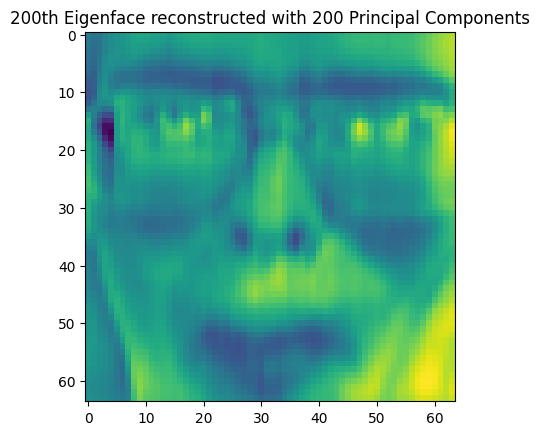

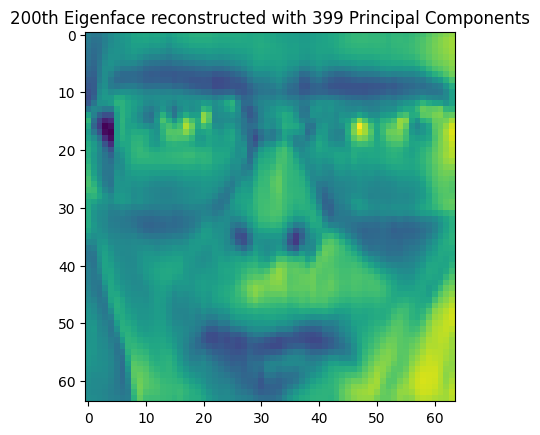

In [32]:
# Reconstruct images and display them
reconstructed_img = [pcaReconstruction(199, i) for i in [10, 100, 200, 399]]
num_pca = [10, 100, 200, 399]

for i in range(0, 4):
    plt.imshow(reconstructed_img[i], interpolation='None')
    plt.title(f'200th Eigenface reconstructed with {num_pca[i]} Principal Components')
    plt.show()